## Importing Dependencies

In [1]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

## Loading Dataset Into Environment

In [2]:
main_dir = 'Original'
sub_main_dir = 'Benign'
sample_image_name = os.listdir(os.path.join(main_dir, sub_main_dir))[1]
sample_image_path = os.path.join(main_dir, sub_main_dir, sample_image_name)

### Observing The sample Data

In [3]:
def show_image(img, title=""):
    """ This funstion is used to display image quickly"""
    plt.imshow(img)
    plt.title(title, fontsize=20)
    plt.show()

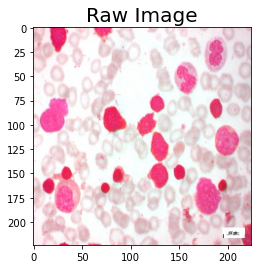

(224, 224, 3)


In [4]:
# Loading the image into path
img = cv.imread(sample_image_path)
show_image(img, "Raw Image")
print(img.shape)

## Preprocessing Images

In [5]:
def show_sample(benign, early, pre, pro):
    fig, ax = plt.subplots(ncols=4, figsize=(20,20))
    ax[0].imshow(benign)
    ax[0].title.set_text("Benign")
    ax[1].imshow(early)
    ax[1].title.set_text("Early")
    ax[2].imshow(pre)
    ax[2].title.set_text("Pre")
    ax[3].imshow(pro)
    ax[3].title.set_text("Pro")

In [6]:
def preprocesor(img_position = 3):
    """
    This function takes in images and performs a set of predefined preprocessing tecniques 
    using open cv
    """
    
    # Image Paths
    benign_img = cv.imread(os.path.join('Original', 'Benign', f'WBC-Benign-00{img_position}.jpg'))
    early_img = cv.imread(os.path.join('Original', 'Early', f'WBC-Malignant-Early-00{img_position}.jpg'))
    pre_img = cv.imread(os.path.join('Original', 'Pre', f'WBC-Malignant-Pre-00{img_position}.jpg'))
    pro_img = cv.imread(os.path.join('Original', 'Pro', f'WBC-Malignant-Pro-00{img_position}.jpg'))
    
    
    # Displaying the original Images
    show_sample(benign_img,early_img,pre_img,pro_img)
    
    # Images sharpening
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    
    kernel = np.array([[-1, -1, -1],
                       [-1, 9,-1],
                       [-1, -1, -1]])
    
    benign_sharp = cv.filter2D(src=benign_img, ddepth=-1, kernel=kernel)
    early_sharp = cv.filter2D(src=early_img, ddepth=-1, kernel=kernel)
    pre_sharp = cv.filter2D(src=pre_img, ddepth=-1, kernel=kernel)
    pro_sharp = cv.filter2D(src=pro_img, ddepth=-1, kernel=kernel)
    
    # Displaying the preprocessed image
    show_sample(benign_sharp, early_sharp, pre_sharp, pro_sharp)
    
    # Image Thresholding
    th, benign_thresh = cv.threshold(benign_sharp, 200, 255, cv.THRESH_TRUNC)
    th, early_thresh = cv.threshold(early_sharp, 200, 255, cv.THRESH_TRUNC)
    th, pre_thresh = cv.threshold(pre_sharp, 200, 255, cv.THRESH_TRUNC)
    th, pro_thresh = cv.threshold(pro_sharp, 200, 255, cv.THRESH_TRUNC)
    
    # Displaying the preprocessed image
    show_sample(benign_thresh, early_thresh, pre_thresh, pro_thresh)
    
    # Blurring the Images using median filter
    benign_blur = cv.medianBlur(benign_thresh, 9)
    early_blur = cv.medianBlur(early_thresh, 9)
    pre_blur = cv.medianBlur(pre_thresh, 9)
    pro_blur = cv.medianBlur(pro_thresh, 9)
    
    # Displaying the preprocessed image
    show_sample(benign_blur, early_blur, pre_blur, pro_blur)
    
    # Scaling and converting the image contrast and brightness
    alpha = 0.8
    beta = 100
    benign_contrast = cv.convertScaleAbs(benign_blur, alpha=alpha, beta=beta)
    early_contrast = cv.convertScaleAbs(early_blur, alpha=alpha, beta=beta)
    pre_contrast = cv.convertScaleAbs(pre_blur, alpha=alpha, beta=beta)
    pro_contrast = cv.convertScaleAbs(pro_blur, alpha=alpha, beta=beta)
    
    # Displaying the preprocessed image
    show_sample(benign_contrast, early_contrast, pre_contrast, pro_contrast)

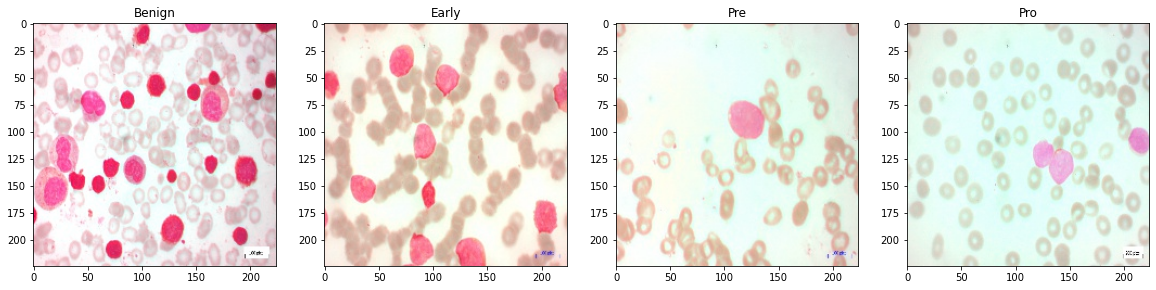

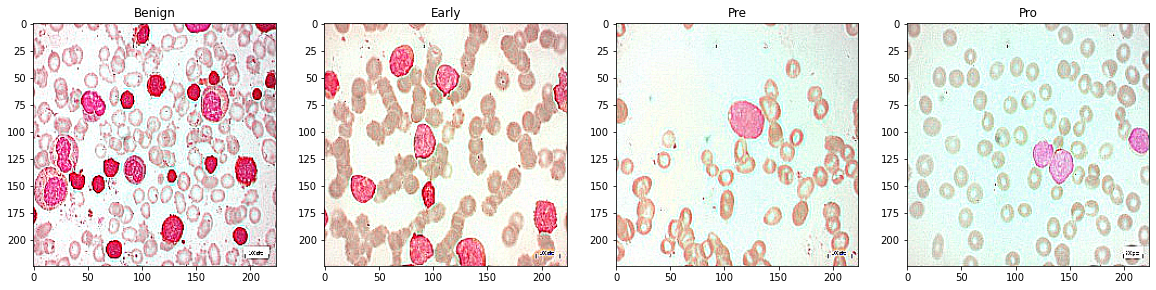

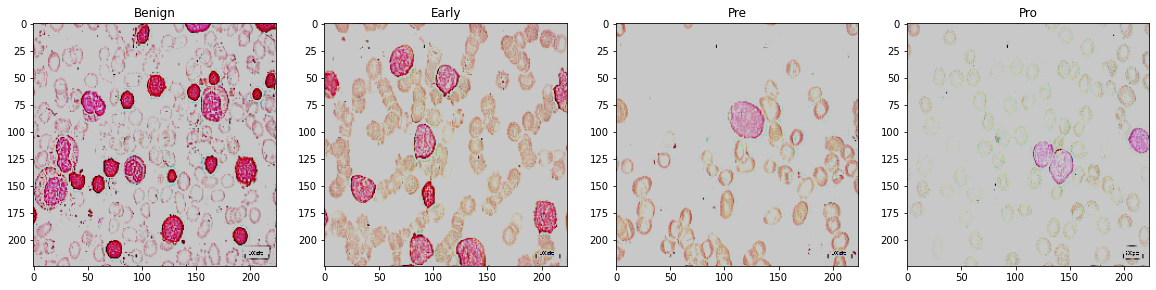

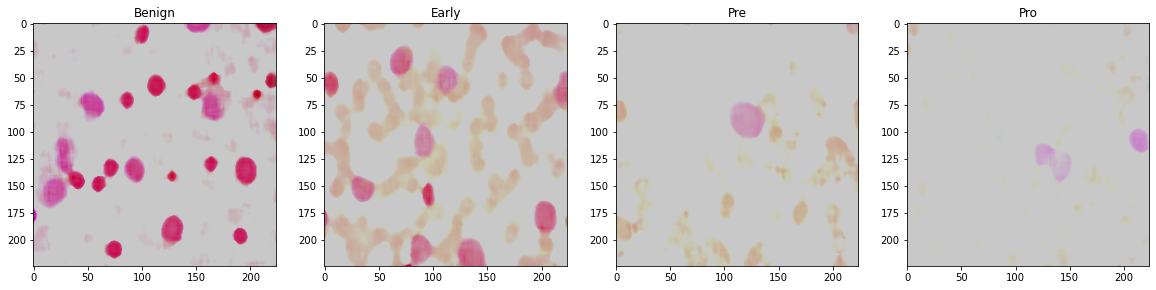

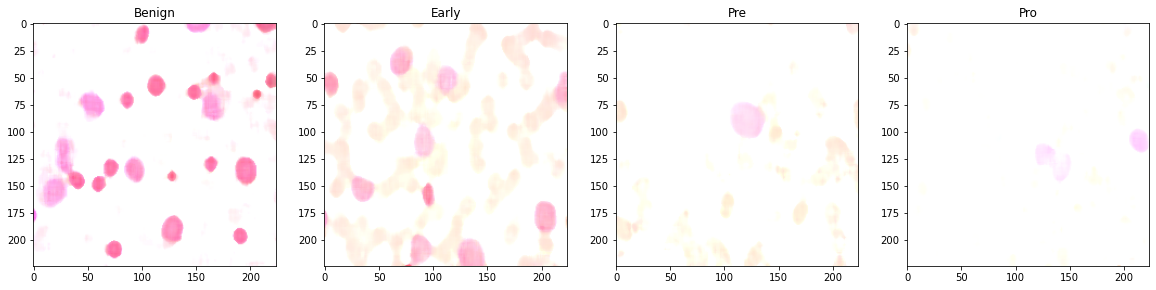

In [7]:
preprocesor(3)

## Others

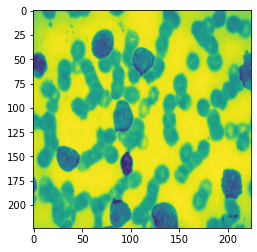

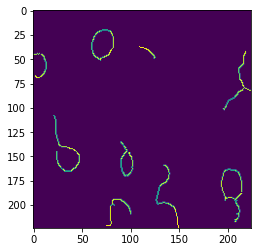

In [40]:
#Edge detection on guassian filter

sample_img = cv.imread(os.path.join('Original', 'Early', f'WBC-Malignant-Early-003.jpg'))

# Graying image
sample_gray = cv.cvtColor(sample_img, cv.COLOR_BGR2GRAY)
show_image(sample_gray)

# apply gaussian filter for smoothing
blurG = cv.GaussianBlur(sample_gray, (9, 9), 0)


# Canny edge detection
edgeG = cv.Canny(blurG, 100, 200)

# Displaying result
show_image(edgeG)

In [43]:
# apply median filter for smoothing
blurM = cv.medianBlur(sample_gray, 5)

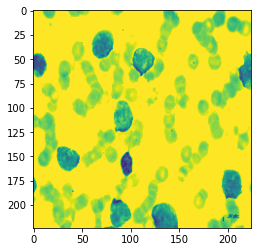

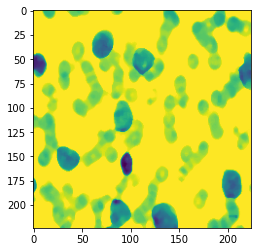

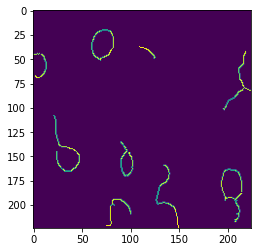

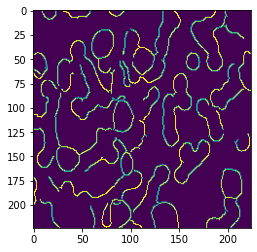

In [46]:
# contrast stretching 
# Function to map each intensity level to output intensity level. 
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1) * pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2) / (255 - r2)) * (pix - r2) + s2
  
    # Define parameters. 
  
  
r1 = 70
s1 = 0
r2 = 200
s2 = 255
  
# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelVal)
  
# Apply contrast stretching. 
contrast_stretched = pixelVal_vec(sample_gray, r1, s1, r2, s2)
contrast_stretched_blurM = pixelVal_vec(blurM, r1, s1, r2, s2)

show_image(contrast_stretched)
show_image(contrast_stretched_blurM)

# Canny edge detection
edgeCont = cv.Canny(blurG, 100, 200)
edgeCont2 = cv.Canny(blur_M, 100, 200)

show_image(edgeCont)
show_image(edgeCont2)